<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Underwater%20Trash%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect traffic signs



## 3. How to train using MMdetection wrapper

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/16_mmdet/installation
     
 - Select the right file and run
 
     - chmod +x install.sh && ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/16_mmdet/installation && chmod +x install.sh && ./install.sh

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rsNMKHN2cn2kDUak2Gkz2A2qFNOlStzS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1rsNMKHN2cn2kDUak2Gkz2A2qFNOlStzS" -O obj_underwater_trafficsigns_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq obj_underwater_trafficsigns_trained.zip

In [4]:
gtf.Model_Params("work_dirs/config_updated/config_updated.py", 
                 "work_dirs/config_updated/latest.pth")

Inference Time: 0.1191565990447998 sec
Saving Time: 0.05091285705566406 sec


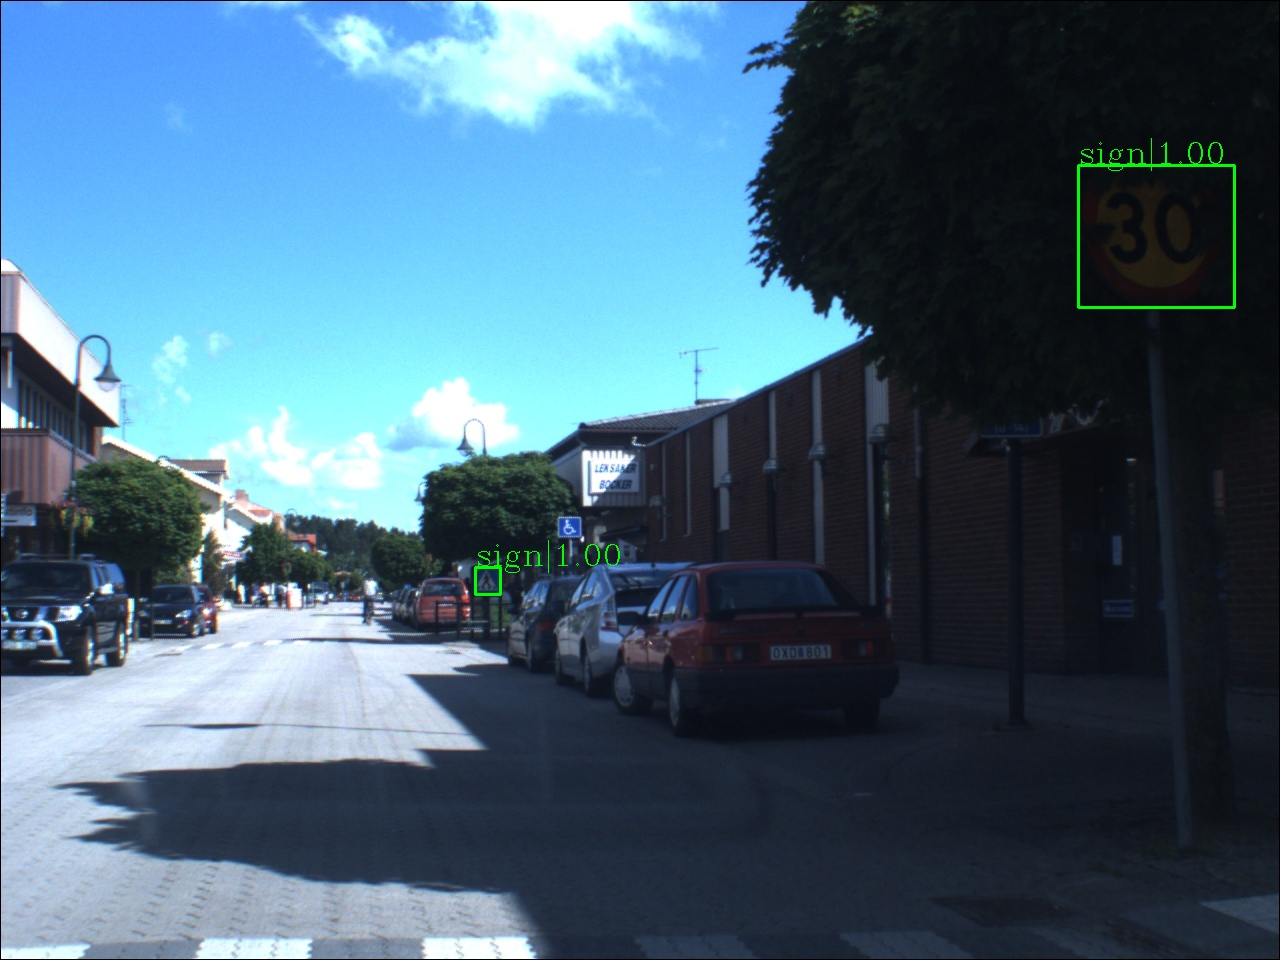

In [12]:
result = gtf.Predict(img_path="work_dirs/test/1.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.12156248092651367 sec
Saving Time: 0.0509493350982666 sec


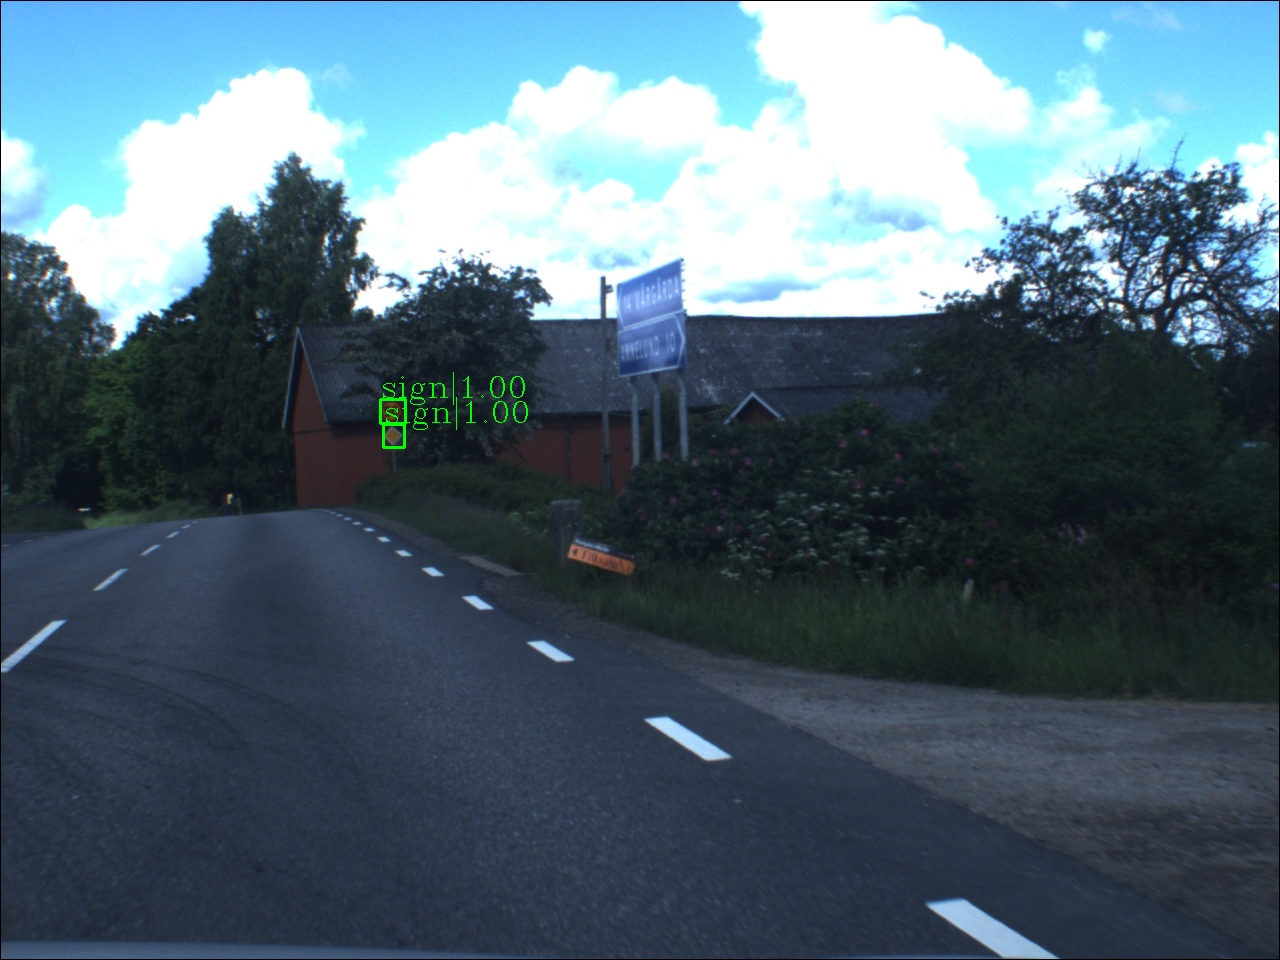

In [30]:
result = gtf.Predict(img_path="work_dirs/test/2.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.11775898933410645 sec
Saving Time: 0.05459856986999512 sec


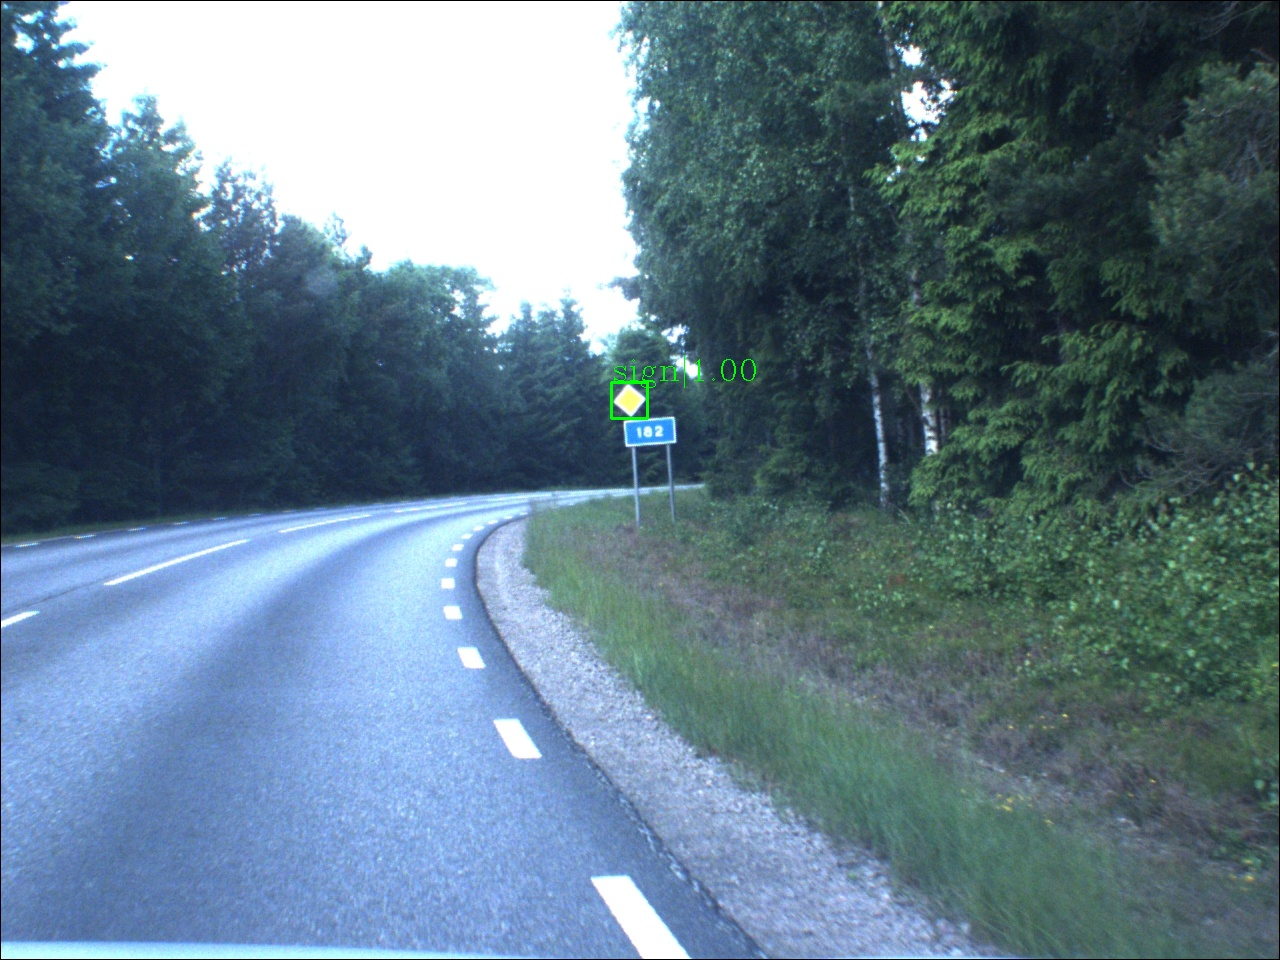

In [21]:
result = gtf.Predict(img_path="work_dirs/test/3.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.11526894569396973 sec
Saving Time: 0.05082297325134277 sec


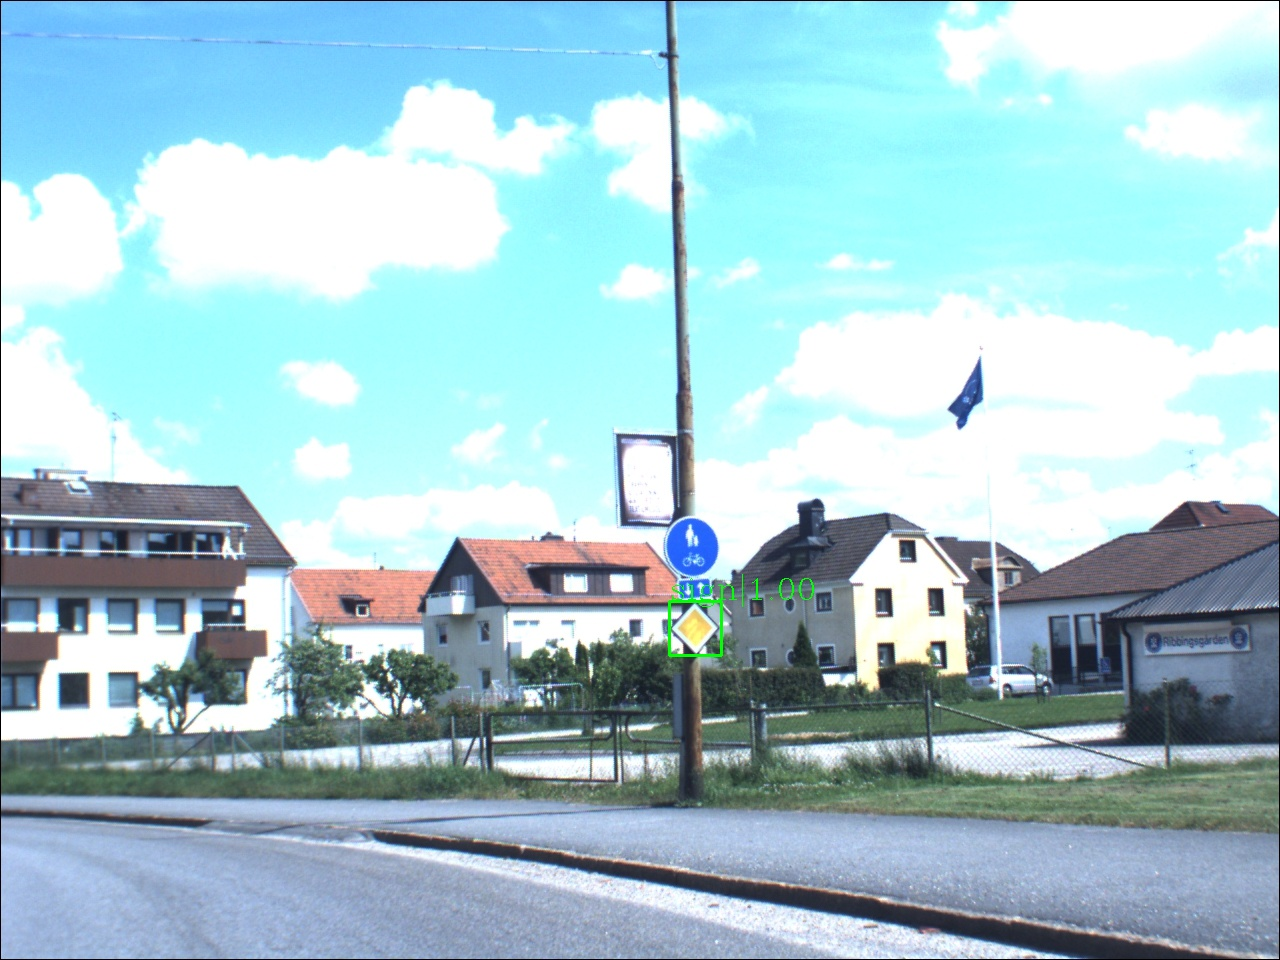

In [22]:
result = gtf.Predict(img_path="work_dirs/test/4.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.1278076171875 sec
Saving Time: 0.0672149658203125 sec


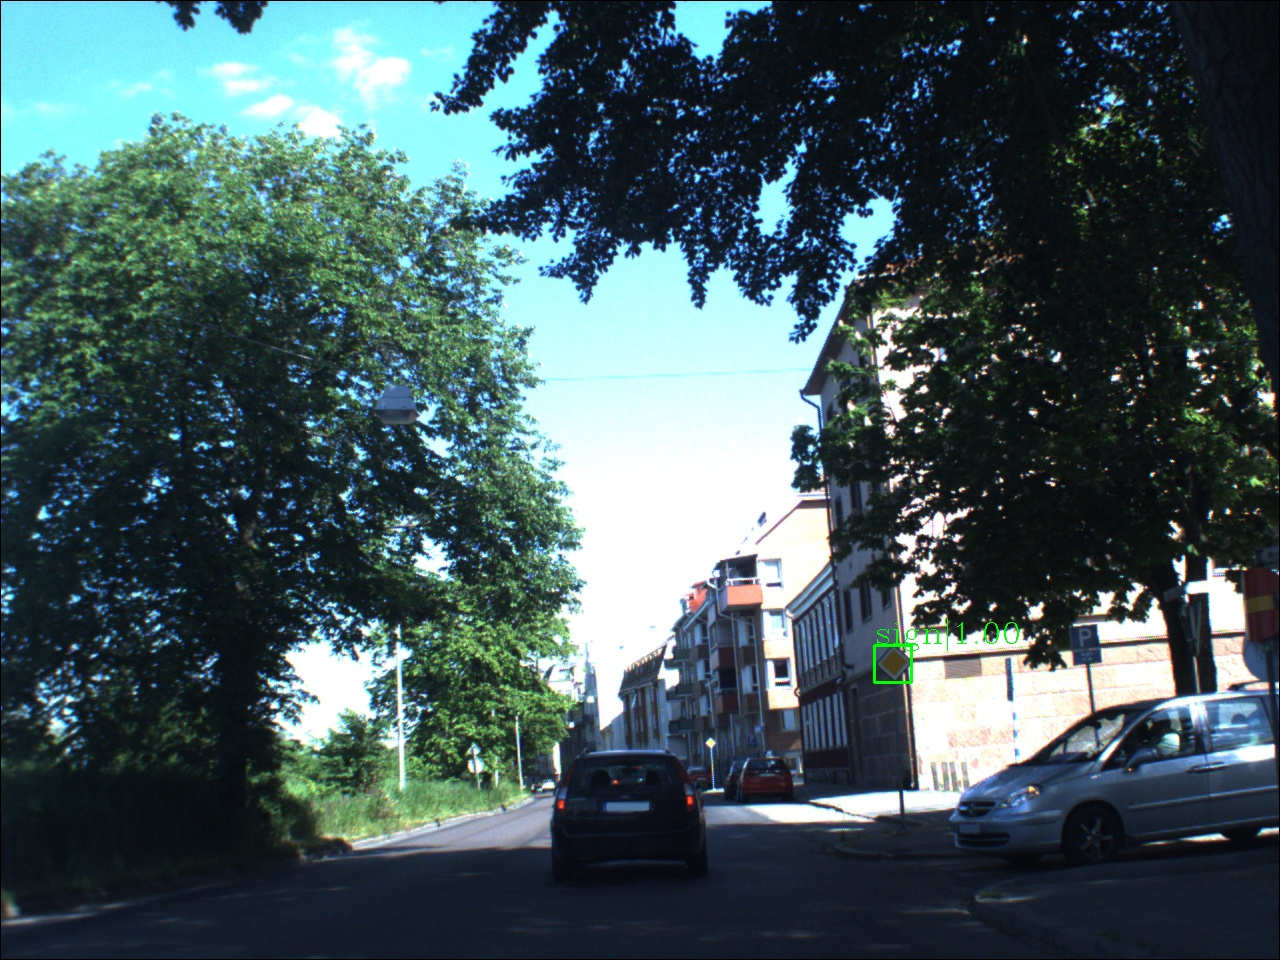

In [23]:
result = gtf.Predict(img_path="work_dirs/test/5.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.1205148696899414 sec
Saving Time: 0.05057501792907715 sec


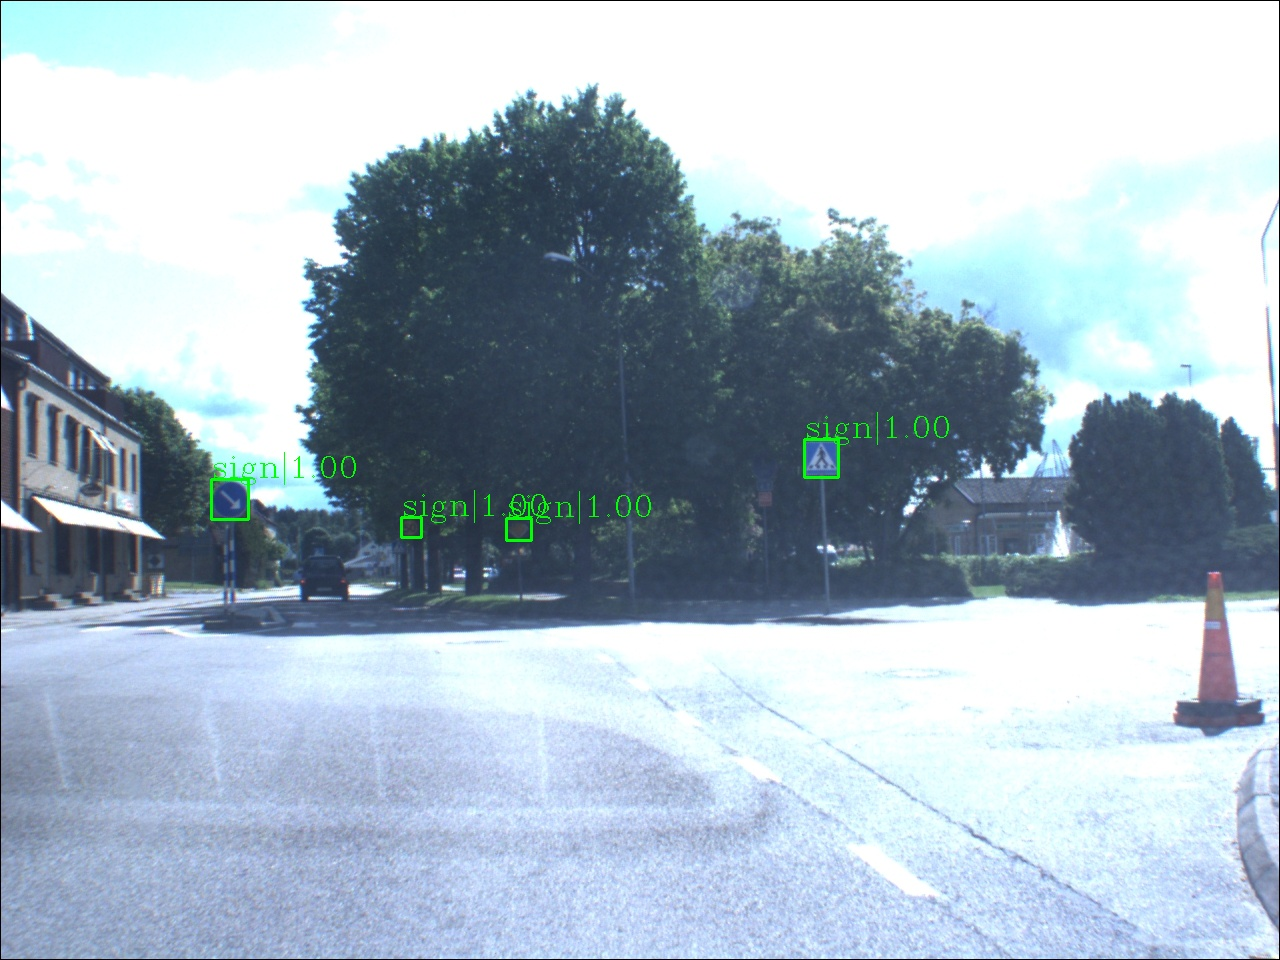

In [32]:
result = gtf.Predict(img_path="work_dirs/test/6.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.11403346061706543 sec
Saving Time: 0.04972648620605469 sec


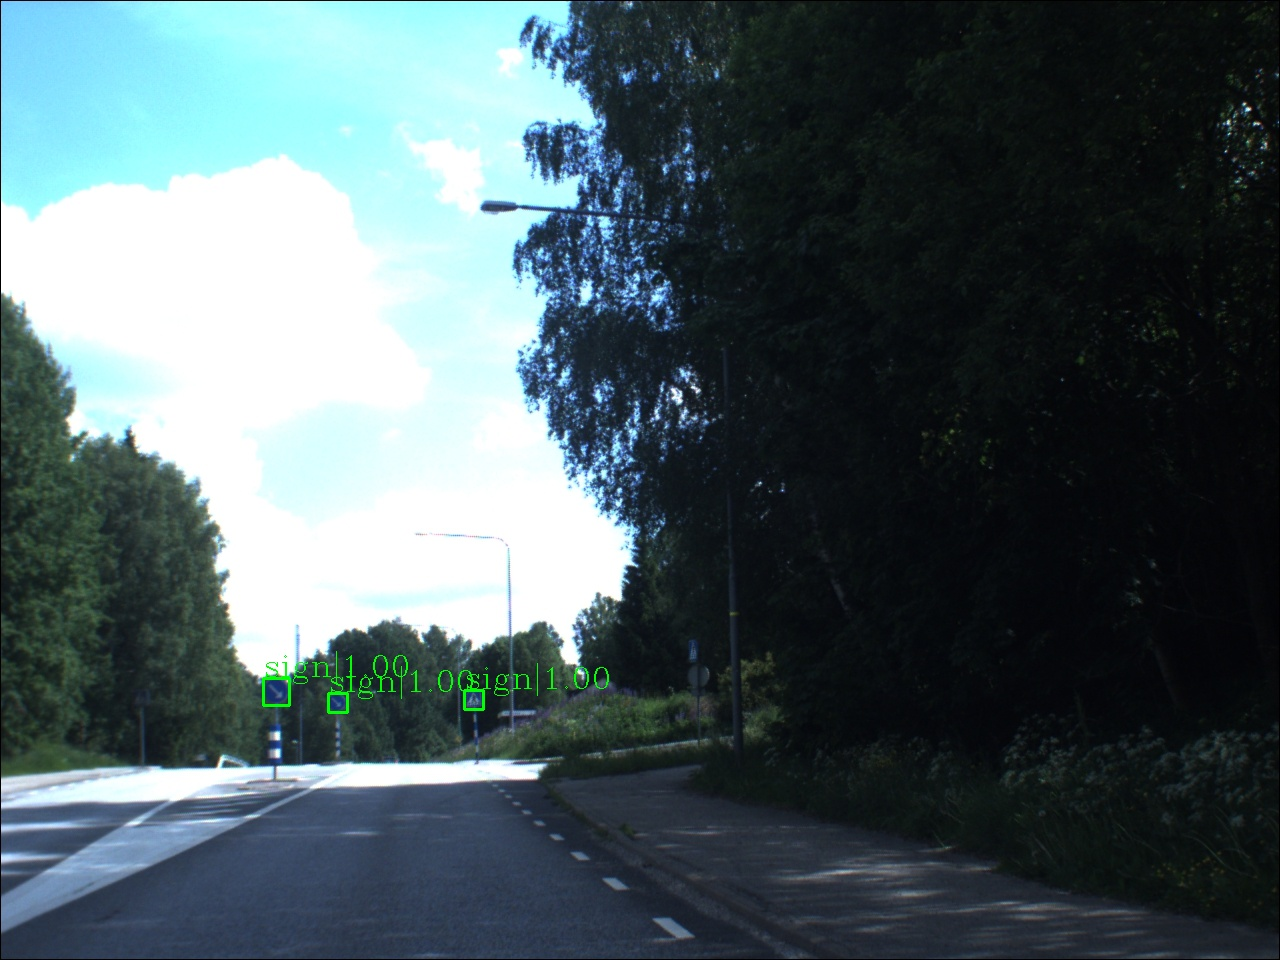

In [25]:
result = gtf.Predict(img_path="work_dirs/test/7.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='green', text_color='green', thickness=2, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

Inference Time: 0.11674904823303223 sec
Saving Time: 0.05228734016418457 sec


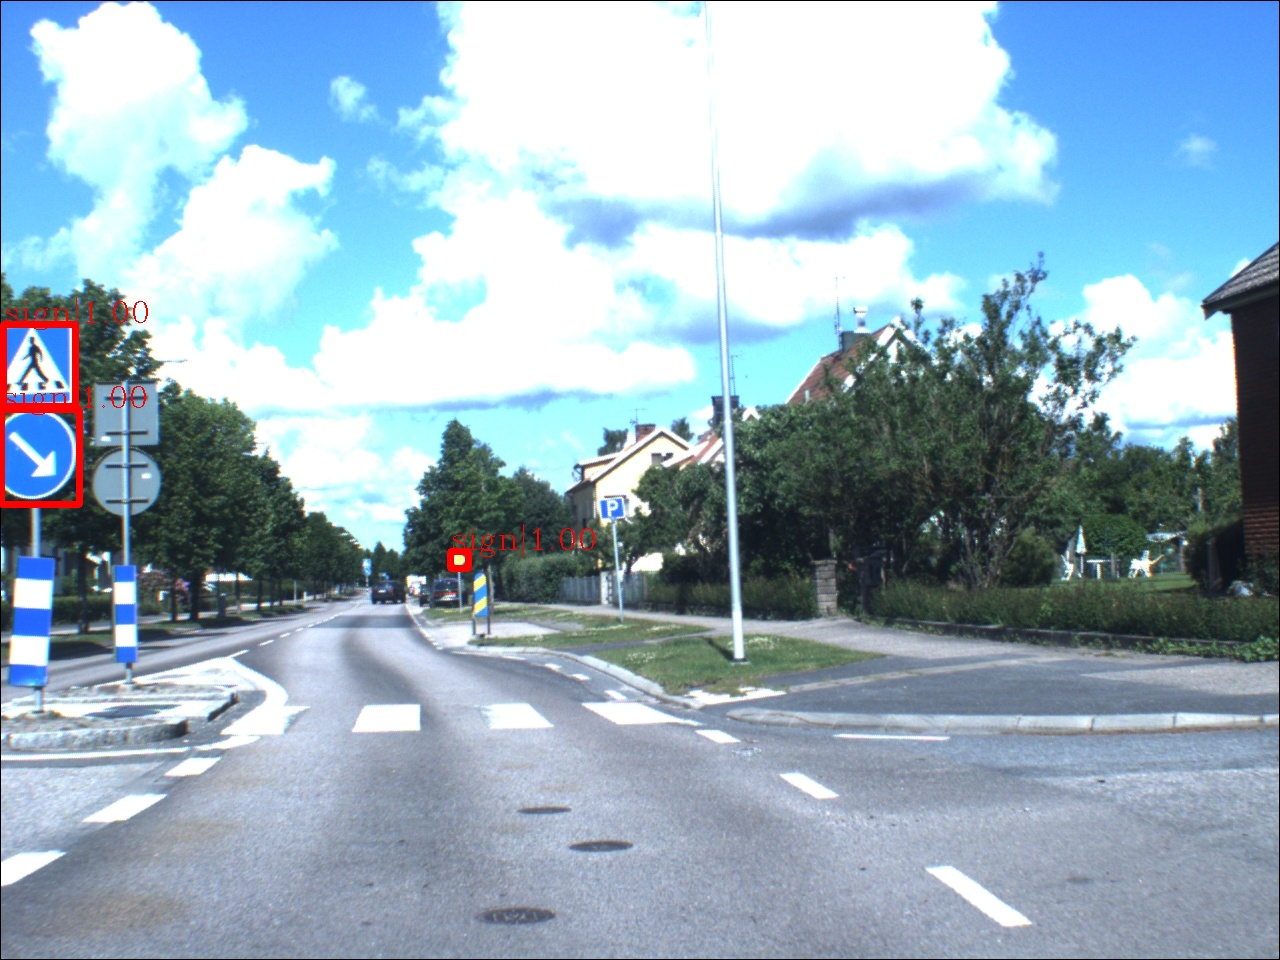

In [28]:
result = gtf.Predict(img_path="work_dirs/test/8.jpg",
           out_img_path="result.jpg",
           thresh=0.8, bbox_color='red', text_color='red', thickness=5, font_scale=1.0);

from IPython.display import Image
Image(filename='result.jpg', width=600) 

# Training your own detector

## Dataset
 - Credits: http://www.cvl.isy.liu.se/research/datasets/traffic-signs-dataset/

In [ ]:
! wget http://www.isy.liu.se/cvl/research/trafficSigns/swedishSignsSummer/Set1/Set1Part0.zip
! wget http://www.isy.liu.se/cvl/research/trafficSigns/swedishSignsSummer/Set2/Set2Part0.zip
! wget http://www.isy.liu.se/cvl/research/trafficSigns/swedishSignsSummer/Set1/annotations.txt -O set1_annotations.txt
! wget http://www.isy.liu.se/cvl/research/trafficSigns/swedishSignsSummer/Set2/annotations.txt -O set2_annotations.txt

In [ ]:
! unzip -qq Set1Part0.zip -d part1
! unzip -qq Set2Part0.zip -d part2

In [ ]:
! mkdir images

In [ ]:
# manually change lines 
#1250 in set2_annotations.txt
478.4376l0 to 478.4376
# 1251 in set2_annotations.txt
318.3432l0 to 318.3432

#656 in set1_annotations.txt
698.358500,MANDATORY to 698.358500, MANDATORY

# Data Conversion from current format to COCO Format

# Current Format

## Dataset Directory Structure

       Dataset (root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------Annotations (anno_dir)
          |              |
          |              |------------------img1.xml
          |              |------------------img2.xml
          |              |------------------.........(and so on)

# COCO Format

## Dataset Directory Structure

       Dataset (root_dir)
          |
          |
          |
          |---Images (img_dir)
          |----|
               |-------------------img1.jpg
               |-------------------img2.jpg
               |-------------------.........(and so on)
 
 
          |---annotations (anno_dir)
          |----|
               |--------------------instances_Images.json 
               |--------------------classes.txt
          
          
 - instances_Images.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd

f = open("set1_annotations.txt");
lines = f.readlines();
f.close();

combined = [];
for i in tqdm(range(len(lines))):
    tmp1 = lines[i][:len(lines[i])-1].split(":");
    img_name = tmp1[0];
    tmp2 = tmp1[1].split(";");
    
    
    wr = "";
    if(len(tmp2) > 2):
        for j in range(len(tmp2)):
            tmp3 = tmp2[j].split(", ")           
            if(len(tmp3) > 1):
                x2 = int(float(tmp3[1]));
                y2 = int(float(tmp3[2]));
                x1 = int(float(tmp3[3]));
                y1 = int(float(tmp3[4]));
                label = tmp3[6];
                
                # for detection only
                wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " sign ";

                # for recognition uncomment line below and comment out line above
                wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label + " ";
        
        wr = wr[:len(wr) - 1];
        
        combined.append([img_name, wr]);
        
        os.system("cp part1/" + img_name + " images/")

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

f = open("set2_annotations.txt");
lines = f.readlines();
f.close();

combined = [];
for i in tqdm(range(len(lines))):
    tmp1 = lines[i][:len(lines[i])-1].split(":");
    img_name = tmp1[0];
    tmp2 = tmp1[1].split(";");
    
    
    wr = "";
    if(len(tmp2) > 2):
        for j in range(len(tmp2)):
            tmp3 = tmp2[j].split(", ")           
            if(len(tmp3) > 1):
                x2 = int(float(tmp3[1]));
                y2 = int(float(tmp3[2]));
                x1 = int(float(tmp3[3]));
                y1 = int(float(tmp3[4]));
                label = tmp3[6];
                
                # for detection only
                wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " sign ";

                # for recognition uncomment line below and comment out line above
                wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label + " ";
        
        wr = wr[:len(wr) - 1];
        
        combined.append([img_name, wr]);
        
        os.system("cp part2/" + img_name + " images/")

In [ ]:
print(len(combined))

In [ ]:
df = pd.DataFrame(combined, columns = ['ID', 'Label'])
df.to_csv("train_labels.csv", index=False);

In [ ]:
! pip install dicttoxml

In [ ]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd
from tqdm import tqdm

root = "./";
img_dir = "images/";
anno_file = "train_labels.csv";



dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";


if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;



output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";



if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

df = pd.read_csv(input_annotations_path);
columns = df.columns

delimiter = " ";


list_dict = [];
anno = [];
for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();



coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    #print(image_in_path)
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

In [4]:
img_dir = "images";
annofile = "annotations/instances_images.json"
class_file = "annotations/classes.txt"

gtf.Train_Dataset(img_dir, annofile, class_file);

In [5]:
gtf.Val_Dataset(img_dir, annofile);

In [6]:
gtf.Dataset_Params(batch_size=8, num_workers=4)

In [7]:
gtf.List_Models();

1. Model - faster_rcnn_fpn50
2. Model - faster_rcnn_fpn101
3. Model - faster_rcnn_x101_32x4d_fpn
4. Model - faster_rcnn_x101_64x4d_fpn
5. Model - cascade_rcnn_fpn50
6. Model - cascade_rcnn_fpn101
7. Model - cascade_rcnn_x101_32x4d_fpn
8. Model - cascade_rcnn_x101_64x4d_fpn
9. Model - retinanet_r50_fpn
10. Model - retinanet_r101_fpn
11. Model - retinanet_x101_32x4d_fpn
12. Model - retinanet_x101_64x4d_fpn
13. Model - retinanet_ghm_r50_fpn
14. Model - retinanet_ghm_r101_fpn
15. Model - retinanet_ghm_x101_32x4d_fpn
16. Model - retinanet_ghm_x101_64x4d_fpn
17. Model - dh_faster_rcnn_fpn50
18. Model - libra_faster_rcnn_fpn50
19. Model - libra_faster_rcnn_fpn101
20. Model - libra_faster_rcnn_x101_64x4d_fpn
21. Model - libra_retinanet_r50_fpn
22. Model - ga_faster_rcnn_x101_32x4d_fpn
23. Model - ga_faster_rcnn_x101_64x4d_fpn
24. Model - ga_retinanet_x101_32x4d_fpn
25. Model - ga_retinanet_x101_64x4d_fpn
26. Model - fovea_r50_fpn_4x4
27. Model - fovea_r101_fpn_4x4
28. Model - fovea_align_r50_f

In [8]:
gtf.Model_Params(model_name="cascade_rcnn_fpn101");

In [9]:
gtf.Hyper_Params(lr=0.01, momentum=0.9, weight_decay=0.0001);

In [10]:
gtf.Training_Params(num_epochs=100, val_interval=1);

In [ ]:
gtf.Train();

# Run inference on images

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model_Params("work_dirs/config_updated/config_updated.py", 
                 "work_dirs/config_updated/latest.pth")

In [5]:
import os
img_list = os.listdir("images");

In [ ]:
result = gtf.Predict(img_path="images/" + img_list[0],
           out_img_path="result.jpg",
           thresh=0.8);

from IPython.display import Image
Image(filename='result.jpg', width=490, height=640) 